# Problem Statement
Stroke is the second leading cause of death globally, accounting for approximately 11% of all fatalities, according to the World Health Organization (WHO). Despite advancements in healthcare, predicting the likelihood of a stroke remains a challenge. The aim of this project is to forecast the probability of an individual experiencing a stroke based on a range of health parameters. Through the analysis of data pertaining to factors such as age, gender, BMI, and medical history, a machine learning model can be developed to anticipate the likelihood of a stroke in an individual. This model holds promise for early identification, facilitating timely interventions to prevent adverse outcomes.

# The Dataset
The dataset aims to predict the likelihood of stroke by analysing real-world health data from individuals, including patients’ demographics and health attributes. The goal is to provide insights to support early intervention and prevention strategies for stroke. Each row in the data provides relevant information about the patient, such as:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

# The Import Statements
In order to be able to work with the dataset, and then to implement the machine learning models, we need to import the necessary libraries first.

In [1]:
# Pandas is used for handling data structures and data manipulation, such as reading data from CSV files, managing DataFrames, and performing operations like filtering, grouping, and aggregation.
import pandas as pd


# Matplotlib's pyplot module is used for creating visualisations such as line charts, bar charts, histograms, scatter plots, and more. It provides control over plot elements like titles, labels, and legends.
import matplotlib.pyplot as plt


# The RandomForestClassifier from scikit-learn is used for creating a random forest model, which is an ensemble machine learning method based on decision trees, commonly used for classification tasks.
from sklearn.ensemble import RandomForestClassifier

# The MLPClassifier (Multilayer Perceptron) is a neural network model that supports multi-layer architecture for performing classification tasks, especially useful for more complex datasets.
from sklearn.neural_network import MLPClassifier

# KNeighborsClassifier is used for implementing the k-Nearest Neighbors algorithm, which is a simple, instance-based learning algorithm for classification tasks based on feature similarity.
from sklearn.neighbors import KNeighborsClassifier

# Confusion matrix is a performance evaluation metric used to summarize the results of a classification model by showing the count of true positive, true negative, false positive, and false negative predictions.
from sklearn.metrics import confusion_matrix

# Classification report is used to provide a detailed performance evaluation of a classifier, including precision, recall, F1 score, and accuracy for each class in the dataset.
from sklearn.metrics import classification_report

# ConfusionMatrixDisplay is used to visually represent the confusion matrix in the form of a heatmap, making it easier to interpret the classification results.
from sklearn.metrics import ConfusionMatrixDisplay

# SMOTE (Synthetic Minority Oversampling Technique) is used to handle imbalanced datasets by generating synthetic examples for the minority class, improving model performance when dealing with imbalanced data.
from imblearn.over_sampling import SMOTE

# train_test_split is used to split the dataset into training and testing subsets. This ensures that the model is trained on one part of the data and tested on another, allowing for evaluation of model performance on unseen data.
from sklearn.model_selection import train_test_split

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Creating the Machine Learning Model Class
Since we will implement multiple machine learning models and compare their performances, and also because we want to comply with the rules and design of Object-Oriented Programming principles, we will create a class called `StrokeRiskPredictor` that will contain all the machine learning models, their implementations, and data preprocessing steps as different functions.

In [3]:
class StrokeRiskPredictor:
    def __init__(self, data_path):
        # Load the dataset from the specified path
        self.data = pd.read_csv(data_path)

The `StrokeRiskPredictor` will only have one parameter in its constructor, which is the dataset file path. The dataset file path will be used to load the dataset into the class.

# Data Preprocessing
Before implementing the machine learning models, we need to preprocess our dataset so that the shape of the dataset is suitable for the machine learning models we are implementing. In our case here are the data preprocessing steps we need to take:

## One-Hot Encoding Categorical Variables:
Since most of the categorical data in our dataset is text based, we need to convert them into numerical format. One way to do this is to use one-hot encoding. One-hot encoding is a process by which categorical variables are converted into a numerical format without an arbitrary ordering. This is done by creating binary columns for each category in the categorical variable. For example, if we have a categorical variable called ever_married with two categories 'Yes' and 'No', one-hot encoding will create two columns called ever_married_Yes and ever_married_No. If a patient is married, the ever_married_Yes column will have a value of 1 and the ever_married_No column will have a value of 0. If a patient is not married, the ever_married_Yes column will have a value of 0 and the ever_married_No column will have a value of 1. This way, we can represent categorical variables in a numerical format that machine learning models can understand.

## Filling Missing BMI Values:
The `bmi` column in our dataset has some missing values. In order to be able to use the `bmi` column in our machine learning models, we first need to fill in these missing values. One way to fill in these missing values is to use the `fillna()` method from pandas with the `median()` method. The `median()` method calculates the median of the `bmi` column and fills in the missing values with this value.

## Dropping Unnecessary Columns:
The `stroke` column is the target variable that we want to predict. Therefore, we need to separate this column from the rest of the dataset and store it in a separate variable. Likewise, the `id` column is not relevant for prediction purposes, so we can drop it from the dataset. The remaining columns will be used as features for our machine learning models. 

## Separating Features and Target Variable:
After cleaning the data, I assign all the remaining columns to X (the features) and assign the values from the 'stroke' column to y (the target variable).

## Handling Class Imbalance with SMOTE:
Since the dataset might have an imbalance in the target classes(4861 `0` values and 249 `1` values), I use SMOTE (Synthetic Minority Over-sampling Technique) to balance the data. SMOTE helps me by generating synthetic examples for the minority class using examples from the actual dataset, ensuring that the model doesn’t become biased towards the majority class during training. This might make the model a bit inaccurate as the synthetic examples might not be as accurate as the real examples, but that is a trade-off I am willing to make to ensure that the model is not biased towards the majority class.

In [4]:
def preprocess_data(self):
    # Convert categorical variables into numerical representations using one-hot encoding.
    # This will create new binary columns for each unique value in 'gender', 'ever_married',
    # 'work_type', 'Residence_type', and 'smoking_status'. This step is necessary for many machine
    # learning models, which cannot work directly with categorical data.
    dataset_stroke_prediction_encoded = pd.get_dummies(self.data, columns=[
                                                       'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

    # Replace any missing values in the 'bmi' column with the median value of 'bmi' from the dataset.
    # Filling missing values with the median ensures that we handle incomplete data without introducing
    # extreme outliers or biases that could arise from using other imputation strategies like mean.
    dataset_stroke_prediction_encoded['bmi'].fillna(
        dataset_stroke_prediction_encoded['bmi'].median(), inplace=True)

    # Select the feature variables (X) by excluding the 'stroke' column, which is the target variable
    # we are trying to predict, and the 'id' column, which is just an identifier and holds no predictive
    # power. This ensures the model only trains on relevant features.
    X = dataset_stroke_prediction_encoded.drop(columns=['stroke', 'id'])

    # Define the target variable (y), which we are trying to predict. In this case, 'stroke' indicates
    # whether a person has had a stroke (1) or not (0). This is the outcome we want to classify.
    y = dataset_stroke_prediction_encoded['stroke']

    # Initialise SMOTE (Synthetic Minority Over-sampling Technique), which is used to address the issue
    # of class imbalance in the dataset. In this case, the number of stroke cases (minority class) is much lower
    # than the number of non-stroke cases (majority class). SMOTE generates synthetic samples to balance the two
    # classes, preventing the model from being biased towards the majority class.
    smote = SMOTE(random_state=42)

    # Apply SMOTE to resample the feature set (X) and the target variable (y). This step will balance the
    # dataset by generating new instances of the minority class (stroke cases), ensuring that both classes
    # (stroke and no stroke) are equally represented in the training data. This helps improve model performance
    # when predicting the minority class.
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Return the resampled features (X_resampled) and target variable (y_resampled). This dataset will be used
    # to train the machine learning model, ensuring a balanced dataset that can better predict stroke cases.
    return X_resampled, y_resampled


# Assign the function to the StrokeRiskPredictor class dynamically so it can be called on class instances.
StrokeRiskPredictor.preprocess_data = preprocess_data

# Separating The Data Into Training and Testing Sets:
Once we have our data prepared, we need to divide it into training and testing sets. We will allocate 70% of the data for training and 30% for testing. The training set will enable the model to understand patterns and relationships within the data, while the testing set will be used to assess the model’s performance on unseen data. This approach allows us to evaluate how well the model can apply its learning to new data, ensuring that it doesn’t just memorise the training data but can also make accurate predictions in real-world scenarios.

In [5]:
def create_training_and_testing_data(self, x, y):
    # Split the data into training and testing sets using train_test_split.
    # 'x' represents the features, and 'y' represents the target (labels).
    # We are splitting the data such that 70% is used for training and 30% for testing.
    # 'random_state=42' ensures that the split is reproducible every time the code is run.
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # Return the split datasets: X_train and y_train are used to train the model,
    # while X_test and y_test are used to evaluate the model's performance on unseen data.
    return X_train, X_test, y_train, y_test


# Dynamically add the create_training_and_testing_data method to the StrokeRiskPredictor class.
StrokeRiskPredictor.create_training_and_testing_data = create_training_and_testing_data

# Machine Learning Model Implementations
It is time to implement various machine learning models to evaluate their performance in predicting the likelihood of a stroke using the `Stroke Prediction Dataset`.

The machine learning models we are going to implement are:
* k-Nearest Neighbors(KNN) Classifier
* Neural Network Classifier
* Random Forest Classifier

## kNN (k-Nearest Neighbors) Classifier
The k-Nearest Neighbors (kNN) algorithm is a simple, non-parametric classification method used to assign a label to an input based on its closest data points in the feature space. It works by finding the “k” number of nearest data points (neighbors) from the training dataset and classifying the input according to the majority class among these neighbors. The distance between data points is typically measured using metrics like Euclidean or Manhattan distance. kNN is a lazy learning algorithm, meaning it doesn’t explicitly learn a model but makes predictions by directly comparing new inputs with stored training examples. Its simplicity makes it easy to implement, but its performance can be affected by the choice of “k” and the scale of the data.

Let's now implement the k-Nearest Neighbors (kNN) Classifier for the `StrokeRiskPredictor` class to make predictions on the `Stroke Prediction Dataset`.

In [6]:
def k_nearest_neighbours_classifier(self, X_train, X_test, y_train, y_test):
    # Initialize the k-Nearest Neighbors classifier with 2 neighbors.
    # 'n_neighbors=2' means the algorithm will look at the 2 nearest data points to classify a new data point.
    model = KNeighborsClassifier(n_neighbors=2)

    # Fit the k-NN model on the training data. This trains the model by storing the data points
    # in memory, which will be used during the prediction phase to find the closest neighbors.
    model.fit(X_train, y_train)

    # Use the trained model to predict the class labels for the test data.
    # 'X_test.values' is used to ensure the input is in the correct format (NumPy array) for prediction.
    y_pred = model.predict(X_test.values)

    # Print the classification report which provides detailed metrics like precision, recall, f1-score,
    # and accuracy for each class. These metrics help evaluate the performance of the classifier.
    # - Precision: Proportion of true positives out of all predicted positives.
    # - Recall: Proportion of true positives out of all actual positives.
    # - F1-Score: Harmonic mean of precision and recall, balancing the two.
    # - Accuracy: Overall correctness of the model.
    print(classification_report(y_test, y_pred))

    # Create a confusion matrix, which compares the actual values with predicted values.
    # It shows the number of true positives, true negatives, false positives, and false negatives.
    # This matrix helps identify how well the model is distinguishing between the classes.
    cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix display object and set the labels for the two classes (0 and 1).
    # The display will visually represent the confusion matrix as a plot, with a color map for easier interpretation.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plot the confusion matrix with a blue color map ('Blues') for better visual distinction.
    # Adding a title 'Confusion Matrix' to the plot for clarity.
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")

    # Display the confusion matrix plot on the screen.
    plt.show()

# Add the k_nearest_neighbours_classifier method to the StrokeRiskPredictor class
StrokeRiskPredictor.k_nearest_neighbours_classifier = k_nearest_neighbours_classifier

## Neural Network Classifier
A Neural Network Classifier is a machine learning algorithm inspired by the structure of the human brain, consisting of layers of interconnected nodes (neurons). Each neuron receives inputs, processes them through weighted connections, and passes the output through an activation function. The network learns by adjusting these weights during training using techniques like backpropagation to minimize the error between predicted and actual outputs. Neural networks are highly flexible and can model complex relationships in data, making them effective for tasks like image classification, speech recognition, and more. However, they require large amounts of data and computational resources to perform well.

Let's now implement the Neural Network Classifier for the `StrokeRiskPredictor` class to make predictions on the `Stroke Prediction Dataset`.

In [7]:
def neural_network_classifier(self, X_train, X_test, y_train, y_test):
    # Initialize the Multi-Layer Perceptron (MLP) classifier with the following parameters:
    # - solver='adam': Optimization algorithm used to train the model (Adam optimizer).
    # - activation='relu': Rectified Linear Unit (ReLU) is used as the activation function, adding non-linearity to the model.
    # - hidden_layer_sizes=(32, 16): Defines the structure of the neural network with 6 hidden layers, each containing the specified number of neurons (32 and 16 respectively).
    # - max_iter=1000: The maximum number of iterations for training.
    # - verbose=True: Enables detailed output during training so we can track progress.
    # - random_state=42: Ensures reproducibility of the results by fixing the random seed.
    # - alpha=0.001: L2 regularization parameter to prevent overfitting by penalizing large weights.
    model = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(32, 16), max_iter=1000, verbose=True, random_state=42, alpha=0.001)
    # Fit the neural network model on the training data.
    # The model will learn patterns from the training set (X_train and y_train) by adjusting weights and biases
    # to minimize the loss (error between actual and predicted values).
    model.fit(X_train, y_train)

    # Evaluate the model on the test data using the model's score method.
    # This will return the mean accuracy on the test data, giving a general idea of the model's performance.
    print(f"Model Test Score: {model.score(X_test, y_test)}")

    # Make predictions on the test set (X_test) using the trained neural network model.
    # The model uses the learned weights to predict the target values (y_pred).
    y_pred = model.predict(X_test)

    # Create a confusion matrix to evaluate how well the model has classified the test data.
    # The matrix will display true positives, true negatives, false positives, and false negatives.
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix with labels matching the model's predicted classes.
    # The color map 'Blues' is used for easier visual interpretation.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')

    # Set the title of the confusion matrix plot to "Confusion Matrix" for clarity.
    plt.title("Confusion Matrix")

    # Show the confusion matrix plot.
    plt.show()

    # Plot the model's loss curve, which shows how the loss function (error) decreased over each iteration during training.
    # This is useful to check if the model has converged or if further training is needed.
    plt.plot(model.loss_curve_)
    plt.title("Model Loss Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")

    # Show the loss curve plot.
    plt.show()
# Add the neural_network_classifier method to the StrokeRiskPredictor class
StrokeRiskPredictor.neural_network_classifier = neural_network_classifier

## Random Forest Classifier
The Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to improve classification accuracy and reduce overfitting. Each tree in the forest is built using a random subset of the training data and features, and the final prediction is made by aggregating the individual predictions from all the trees, typically through a majority vote. This randomness helps create diverse trees, making the model more robust and less sensitive to noise in the data. Random Forest is highly effective for both classification and regression tasks, offering a good balance between accuracy and interpretability while being less prone to overfitting than single decision trees.

Let's now implement the Random Forest Classifier for the `StrokeRiskPredictor` class to make predictions on the `stroke-prediction.csv` dataset.

In [8]:
def random_forest_classifier(self, X_train, X_test, y_train, y_test):
    # Initialize the Random Forest classifier with the following parameters:
    # - random_state=42: Sets the seed for reproducibility, ensuring consistent results across runs.
    # - class_weight='balanced': Adjusts the weights for each class based on their frequency in the data.
    #   This helps handle class imbalances by giving more importance to the minority class.
    model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Train the Random Forest classifier on the training data (X_train, y_train).
    # The model learns by creating multiple decision trees and averaging their predictions to minimize overfitting.
    model.fit(X_train, y_train)

    # Use the trained Random Forest model to make predictions on the test data (X_test).
    # The predicted values (y_pred) are the model's classification output for each sample in the test set.
    y_pred = model.predict(X_test)

    # Print a classification report that provides detailed metrics such as precision, recall, f1-score,
    # and accuracy for the model's predictions. This helps evaluate how well the model performed.
    print(classification_report(y_test, y_pred))

    # Generate a confusion matrix that compares the actual test labels (y_test) with the predicted labels (y_pred).
    # It helps visualize how many samples were correctly or incorrectly classified.
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix in a plot, with labels for both classes (0 and 1).
    # The color map 'Blues' provides a visual representation of the matrix, making it easier to interpret.
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')

    # Set the plot's title to "Confusion Matrix" for clarity.
    plt.title("Confusion Matrix")

    # Display the confusion matrix plot on the screen.
    plt.show()
# Add the random_forest_classifier method to the StrokeRiskPredictor class
StrokeRiskPredictor.random_forest_classifier = random_forest_classifier

# Testing Out The Models
Since now we have implemented all 3 of our machine learning models, it is time to test them out and see how well they perform on the `Stroke Prediction Dataset`. We will evaluate the performance of each model using metrics such as accuracy, precision, recall, and F1 score. These metrics will help us understand how well each model is performing in predicting the likelihood of a stroke.

First, let's preprocess the dataset so that it is ready to be used by our machine learning models.

In [9]:
# Create an instance of the StrokeRiskPredictor class with the path to the dataset.
predictor = StrokeRiskPredictor("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

# Preprocess the data to handle categorical variables and missing values, and balance the dataset using SMOTE.
X_resampled, y_resampled = predictor.preprocess_data()

# Split the preprocessed data into training and testing sets.
X_train, X_test, y_train, y_test = predictor.create_training_and_testing_data(X_resampled, y_resampled)

/tmp/ipykernel_17/3409002403.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_stroke_prediction_encoded['bmi'].fillna(


## Testing out the K-Nearest Neighbors (kNN) Classifier

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1457
           1       0.91      0.96      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



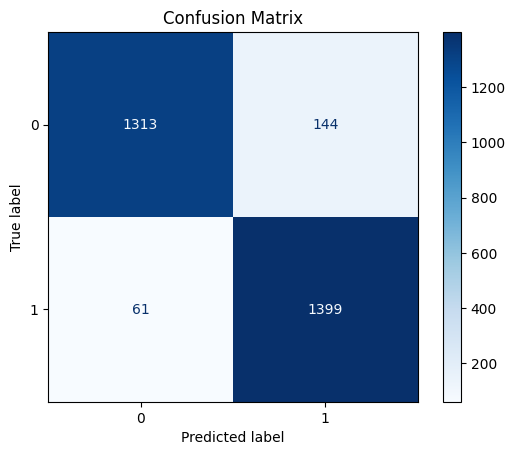

In [10]:
# Train and evaluate a k-Nearest Neighbors classifier on the data.
predictor.k_nearest_neighbours_classifier(X_train, X_test, y_train, y_test)

## Testing out the Neural Network Classifier

Iteration 1, loss = 7.37250557
Iteration 2, loss = 0.93668326
Iteration 3, loss = 0.57315733
Iteration 4, loss = 0.54899955
Iteration 5, loss = 0.53390922
Iteration 6, loss = 0.52159877
Iteration 7, loss = 0.51239965
Iteration 8, loss = 0.50614123
Iteration 9, loss = 0.49821969
Iteration 10, loss = 0.48513401
Iteration 11, loss = 0.47462702
Iteration 12, loss = 0.49375897
Iteration 13, loss = 0.45550122
Iteration 14, loss = 0.44714675
Iteration 15, loss = 0.44589741
Iteration 16, loss = 0.43088415
Iteration 17, loss = 0.42670844
Iteration 18, loss = 0.42159335
Iteration 19, loss = 0.41548634
Iteration 20, loss = 0.41308693
Iteration 21, loss = 0.40160393
Iteration 22, loss = 0.39515657
Iteration 23, loss = 0.39085960
Iteration 24, loss = 0.38135668
Iteration 25, loss = 0.37784582
Iteration 26, loss = 0.37671211
Iteration 27, loss = 0.36563283
Iteration 28, loss = 0.36242580
Iteration 29, loss = 0.35645229
Iteration 30, loss = 0.34809735
Iteration 31, loss = 0.34505049
Iteration 32, los

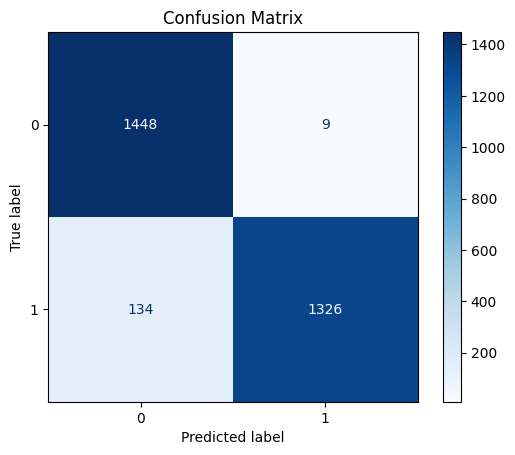

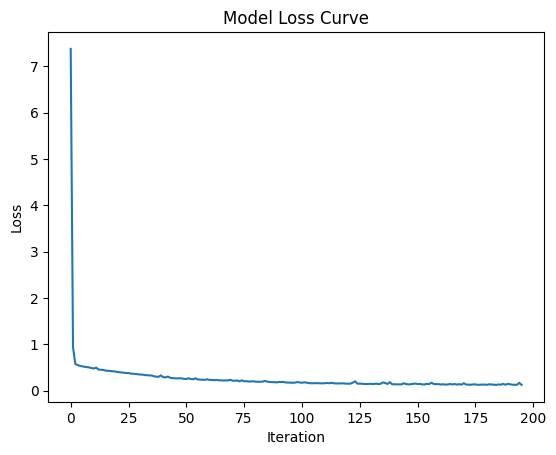

In [11]:
# Train and evaluate a Neural Network classifier on the data.
predictor.neural_network_classifier(X_train, X_test, y_train, y_test)

## Testing out the Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1457
           1       0.99      0.96      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



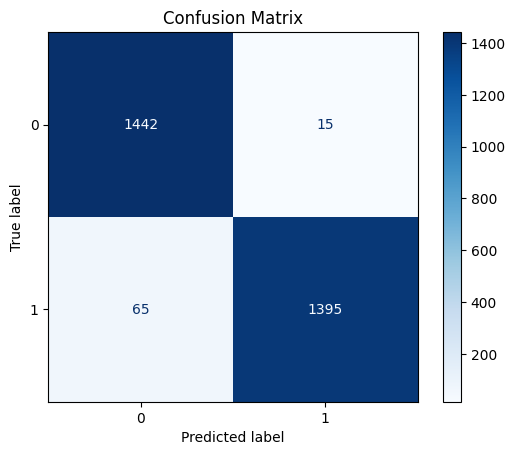

In [12]:
# Train and evaluate a Random Forest classifier on the data.
predictor.random_forest_classifier(X_train, X_test, y_train, y_test)